In [4]:
import pandas as pd
import numpy as np
import warnings #Manejar advertencias que pueden surgir dentro del codigo
warnings.filterwarnings('ignore') #Ignorar advertencias
import matplotlib.pyplot as plt
import seaborn as sns #Visualizar data igual que matplotlib pero más estelizada

from sklearn.model_selection import train_test_split #Para divir data en entrenamiento 
# y prueba
from sklearn.ensemble import RandomForestRegressor #Modelo de regresion basado en 
# arboles alelatorios
from sklearn.metrics import mean_squared_error #Para evaluar el rendimiento del
# modelo usando el MSE(Error cuadratico medio)


In [5]:
df_walmart = pd.read_csv('WMT.csv')
df_walmart

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,22.791668,23.000000,21.833332,22.270832,14.469358,25109700
1,1/4/2000,21.833332,21.937500,21.395832,21.437500,13.927947,20235300
2,1/5/2000,21.291668,21.458332,20.729168,21.000000,13.643703,21056100
3,1/6/2000,21.000000,21.520832,20.895832,21.229168,13.792585,19633500
4,1/7/2000,21.500000,22.979168,21.500000,22.833332,14.834813,23930700
...,...,...,...,...,...,...,...
6113,4/22/2024,59.560001,60.400002,59.040001,60.139999,60.139999,14910000
6114,4/23/2024,60.250000,60.349998,58.560001,59.090000,59.090000,17963900
6115,4/24/2024,58.980000,60.040001,58.810001,59.869999,59.869999,18529100
6116,4/25/2024,60.049999,60.529999,59.830002,60.209999,60.209999,19263000


In [8]:
#Verificando data Faltante
df_walmart.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
#Eliminando filas con valores faltantes, en caso existan
df_walmart.dropna(inplace=True)

In [12]:
#Visualizacion estadistica de la data
df_walmart.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6.118000e+03
mean,25.835724,26.061299,25.618364,25.840958,21.663140,3.145340e+07
std,11.552502,11.628584,11.482173,11.554953,13.027950,1.977651e+07
min,14.000000,14.226667,13.812500,14.090000,9.398979,6.094200e+06
25%,17.486668,17.674166,17.336666,17.500833,11.893549,1.909170e+07
50%,20.193333,20.373333,20.006666,20.225000,15.388837,2.556390e+07
75%,29.551666,29.820834,29.311667,29.589167,26.622051,3.745148e+07
max,61.320000,61.660000,61.049999,61.450001,61.450001,2.903604e+08


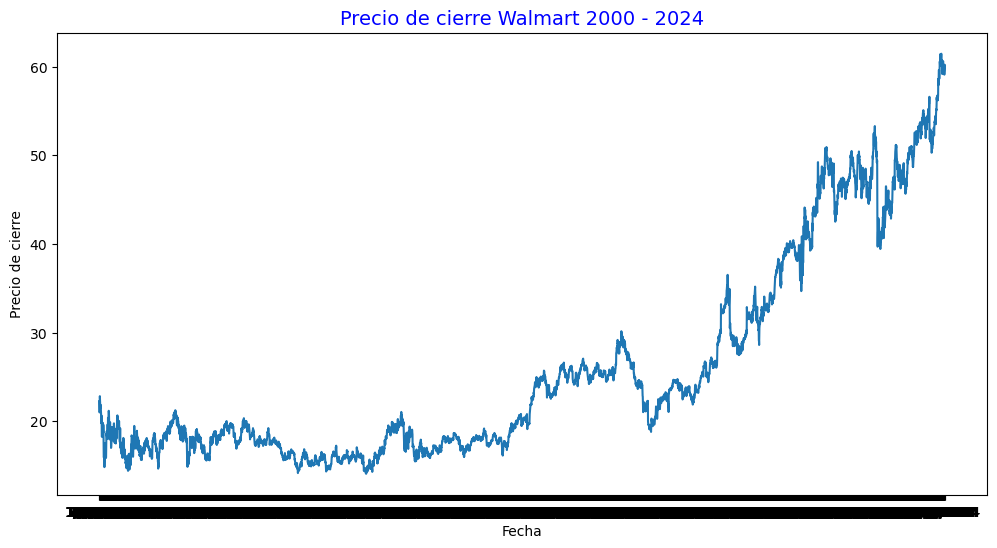

In [14]:
#Graficando los precios de cierre
plt.figure(figsize = (12,6))
plt.plot(df_walmart['Date'],df_walmart['Close'])
plt.title('Precio de cierre Walmart 2000 - 2024',fontsize=14,color='blue')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.show()

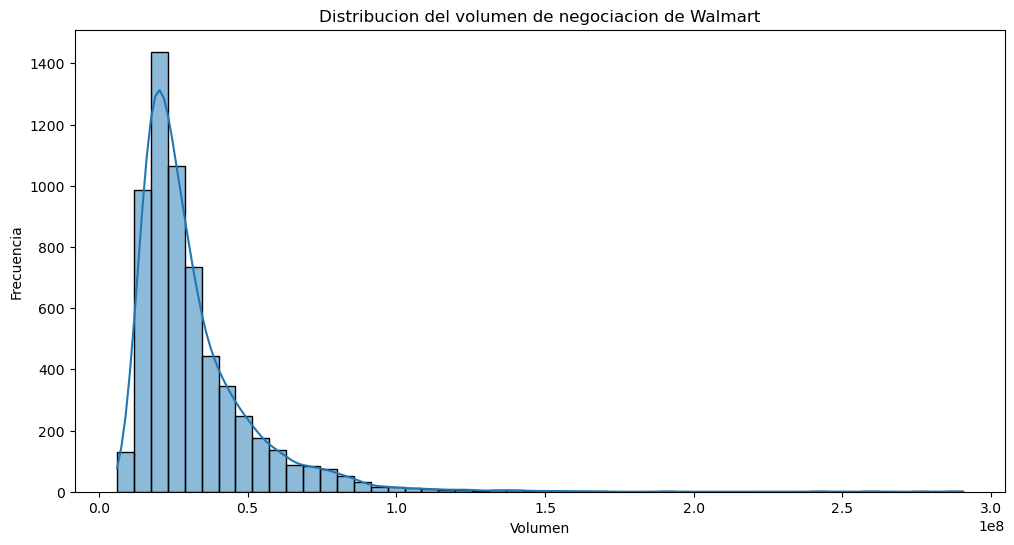

In [13]:
#Distribucion de la visualizacion del volumen de negociacion
plt.figure(figsize = (12,6))
sns.histplot(df_walmart['Volume'],bins=50,kde=True)
plt.title('Distribucion del volumen de negociacion de Walmart')
plt.xlabel('Volumen')
plt.ylabel('Frecuencia')
plt.show()

In [16]:
#Saber el formato de las columnas
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6118 non-null   object 
 1   Open       6118 non-null   float64
 2   High       6118 non-null   float64
 3   Low        6118 non-null   float64
 4   Close      6118 non-null   float64
 5   Adj Close  6118 non-null   float64
 6   Volume     6118 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 334.7+ KB


In [18]:
#Cambiar el tipo de dato para "Date" de Object a datetime64 (Formato fecha)
df_walmart['Date'] = pd.to_datetime(df_walmart['Date'])

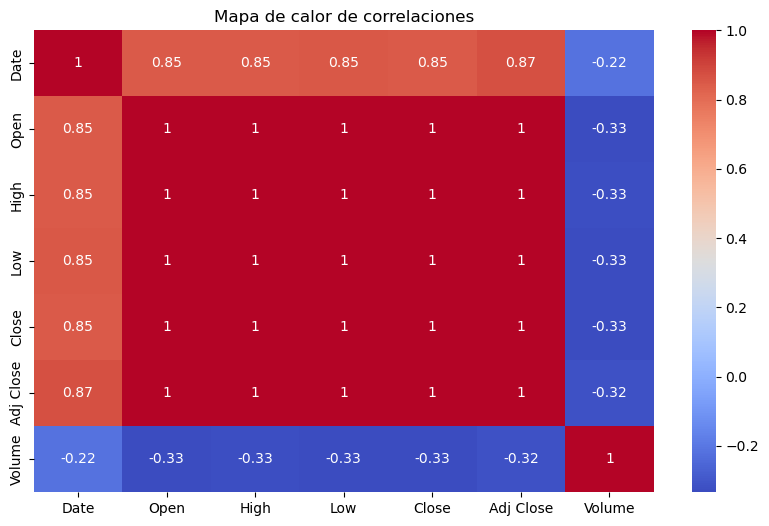

In [20]:
#Mapa de calor paraa ver las correlaciones entre las variables numericas
plt.figure(figsize=(10,6))
sns.heatmap(df_walmart.corr(), annot=True, cmap= 'coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [22]:
#Calculo de las medias moviles
df_walmart['MA50'] = df_walmart['Close'].rolling(window=50).mean()
df_walmart['MA200'] = df_walmart['Close'].rolling(window=200).mean()

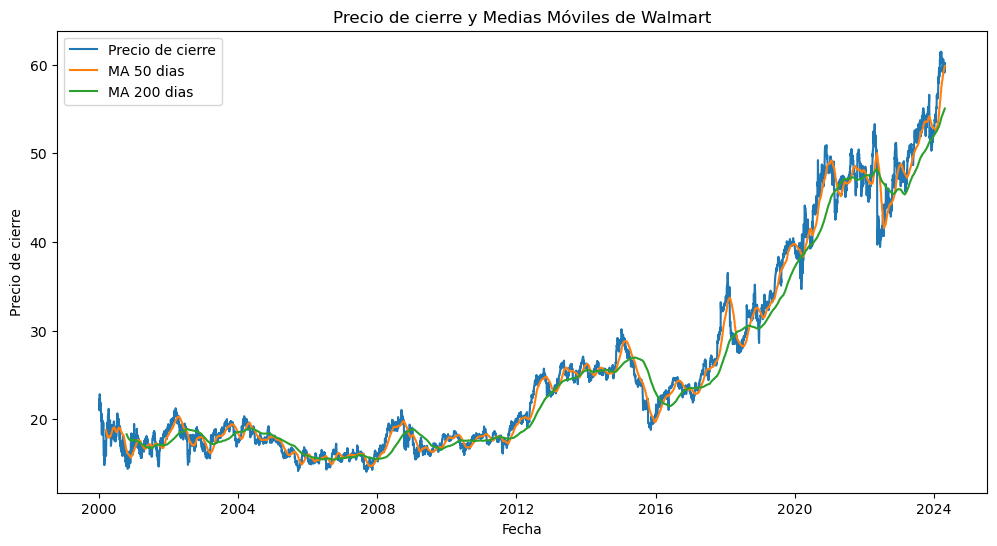

In [24]:
#Graficando las medias moviles junto con el pecio de cierre
plt.figure(figsize = (12,6))
plt.plot(df_walmart['Date'],df_walmart['Close'],label='Precio de cierre')
plt.plot(df_walmart['Date'],df_walmart['MA50'],label='MA 50 dias')
plt.plot(df_walmart['Date'],df_walmart['MA200'],label='MA 200 dias')
plt.title('Precio de cierre y Medias Móviles de Walmart')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()

In [26]:
#Calculo de la volatibilidad de los precios de cierre
df_walmart['Volatilidad'] = df_walmart['Close'].pct_change()
df_walmart

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Volatilidad
0,2000-01-03,22.791668,23.000000,21.833332,22.270832,14.469358,25109700,NaN,NaN,NaN
1,2000-01-04,21.833332,21.937500,21.395832,21.437500,13.927947,20235300,NaN,NaN,-0.037418
2,2000-01-05,21.291668,21.458332,20.729168,21.000000,13.643703,21056100,NaN,NaN,-0.020408
3,2000-01-06,21.000000,21.520832,20.895832,21.229168,13.792585,19633500,NaN,NaN,0.010913
4,2000-01-07,21.500000,22.979168,21.500000,22.833332,14.834813,23930700,NaN,NaN,0.075564
...,...,...,...,...,...,...,...,...,...,...
6113,2024-04-22,59.560001,60.400002,59.040001,60.139999,60.139999,14910000,59.562000,54.875117,0.010247
6114,2024-04-23,60.250000,60.349998,58.560001,59.090000,59.090000,17963900,59.615266,54.914750,-0.017459
6115,2024-04-24,58.980000,60.040001,58.810001,59.869999,59.869999,18529100,59.677333,54.955967,0.013200
6116,2024-04-25,60.049999,60.529999,59.830002,60.209999,60.209999,19263000,59.753933,54.999267,0.005679


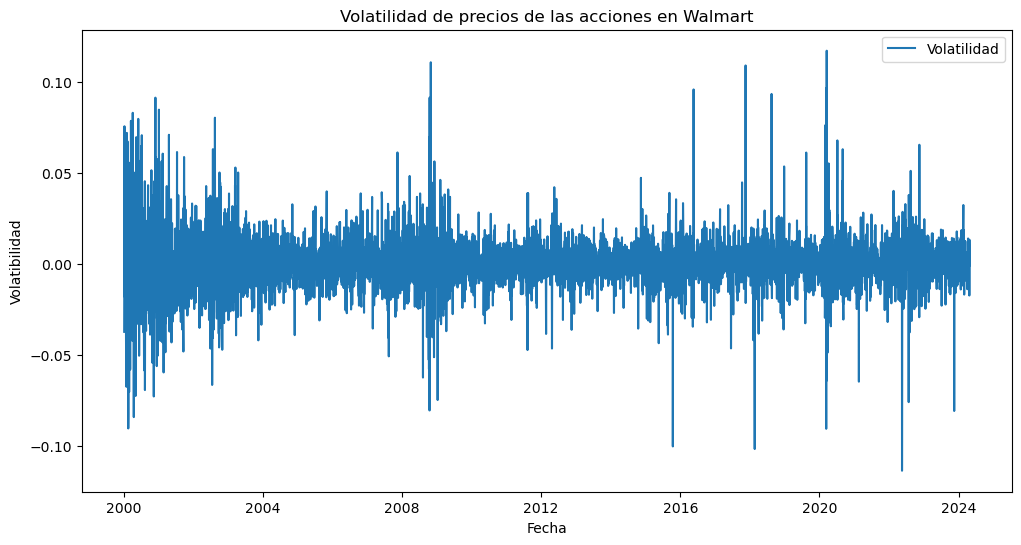

In [28]:
#Graficando la volatilidad 
plt.figure(figsize = (12,6))
plt.plot(df_walmart['Date'],df_walmart['Volatilidad'],label = 'Volatilidad')
plt.legend()
plt.title('Volatilidad de precios de las acciones en Walmart')
plt.xlabel('Fecha')
plt.ylabel('Volatibilidad')
plt.show()

In [30]:
df_walmart['Year'] = df_walmart['Date'].dt.year
annual_returns = df_walmart.groupby('Year')['Close'].last().pct_change()
annual_volume = df_walmart.groupby('Year')['Volume'].sum()
annual_returns #Indica la variacion de precios de cierre de cada año, comparandolo con el año siguiente.
#Si es negativo significa que ha decrecido (perdida) comparado al año siguiente. Ejmplo:
#En 2002 el precio de cierre cayo en un 12.23% en comparacion al 2001

Year
2000         NaN
2001    0.083294
2002   -0.122328
2003    0.050287
2004   -0.004335
2005   -0.113972
2006   -0.013248
2007    0.029233
2008    0.179466
2009   -0.046557
2010    0.008980
2011    0.108103
2012    0.141734
2013    0.153305
2014    0.091371
2015   -0.286213
2016    0.127569
2017    0.428675
2018   -0.056709
2019    0.275792
2020    0.212975
2021    0.003746
2022   -0.020043
2023    0.111856
2024    0.144814
Name: Close, dtype: float64

posx and posy should be finite values
posx and posy should be finite values


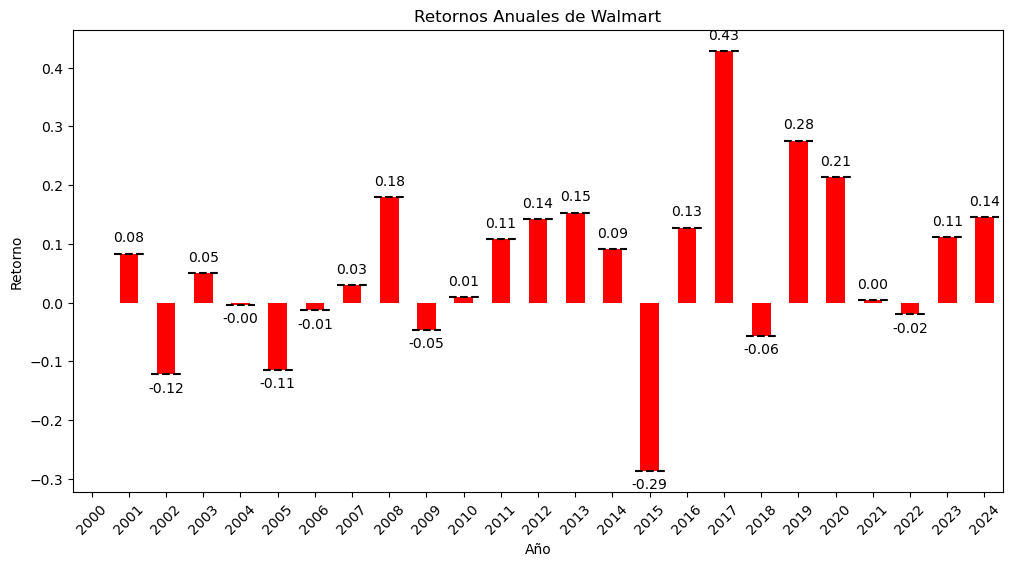

In [32]:
# Gráfico de barras de los retornos anuales con líneas punteadas
plt.figure(figsize=(12, 6))

# Plot de los retornos anuales
annual_returns.plot(kind='bar', color='red')

# Añadir líneas punteadas en los valores de las barras
for index, value in enumerate(annual_returns):
    plt.hlines(value, index - 0.4, index + 0.4, colors='black', linestyles='dashed')  # Líneas punteadas en cada barra
    plt.text(index, value + 0.02 if value >= 0 else value - 0.03, f'{value:.2f}', ha='center', fontsize=10)  # Valores sobre las barras

plt.title('Retornos Anuales de Walmart')
plt.xlabel('Año')
plt.ylabel('Retorno')

# Ajustar las etiquetas del eje X (años)
plt.xticks(rotation=45)
plt.show()

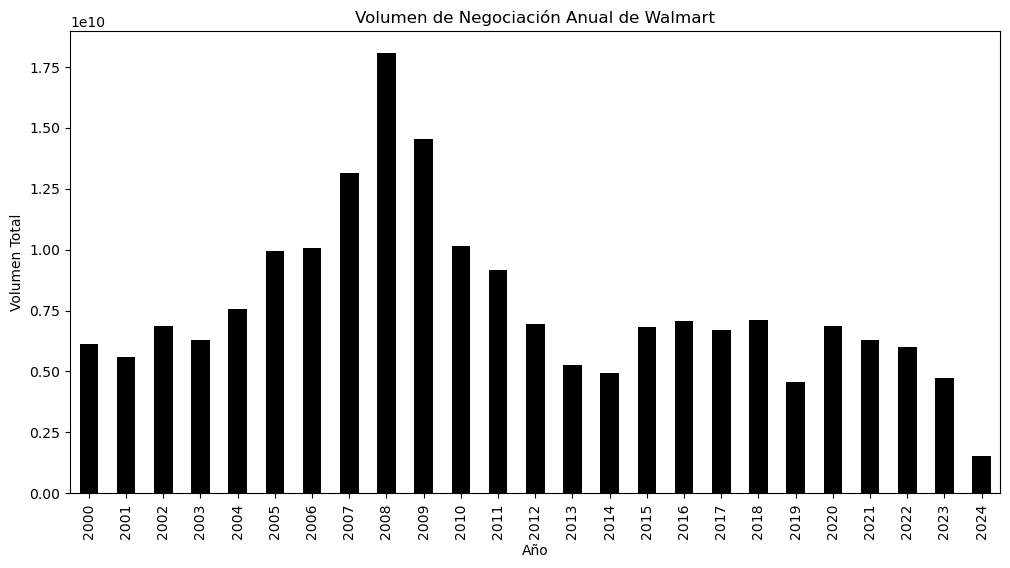

In [34]:
#Grafica de barras del volumen de negociacion anual
plt.figure(figsize=(12,6))
annual_volume.plot(kind='bar',color = 'black')
plt.title('Volumen de Negociación Anual de Walmart')
plt.xlabel('Año')
plt.ylabel('Volumen Total')
plt.show()

In [64]:
# Caracteriscas para realizar el modelo de prediccion
X = df_walmart[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df_walmart['Close']
#

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#

In [68]:
#Creacion del modelo
model = RandomForestRegressor(n_estimators = 100,random_state = 42)

In [70]:
#Entrenando el modelo con los datos de etrenamiento, X_train,Y_train, estos contienen el 80% de la data
#El otro 20% será para comparar el nivel de exactitud de la data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
#Prediciendo los precios de cierre con el conjunto de prueba, para luego compararlos con la data real de los precios (y_test)
y_pred = model.predict(X_test)

In [79]:
#Hallando el error cuadratico medio, esto indica el nivel de exactitud, mientras mas bajo es el valor es más exacto.
mse = mean_squared_error(y_test,y_pred)
print(f'Error Cuadratico medio: {mse}')

Error Cuadratico medio: 0.01821350297785308


In [81]:
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print('Puntaje del Modelo (Entrenamiento):', train_score)  # Imprime el puntaje R^2 del conjunto de entrenamiento
print('Puntaje del Modelo (Prueba):', test_score) #Impresion del puntaje R^2 del conjunto de prueba


Puntaje del Modelo (Entrenamiento): 0.9999779149817004
Puntaje del Modelo (Prueba): 0.9998593467856908
